In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
import glob
colors = plt.cm.tab10.colors
import os
import sys
path = '../Examples/Surface/'

In [12]:
import re

wavefunctions = {}

# List all files in the directory
for filename in os.listdir(os.path.join(path, 'static/')):
    if filename.startswith('wf'):
        k = int(filename.split('-')[1][1:])
        orb = int(filename.split('-')[2][2:6])
        key = str(k) + '_' + str(orb)
        wavefunctions[key] = np.loadtxt(os.path.join(path, 'static/', filename))


Text(0, 0.5, 'Energy (Ha)')

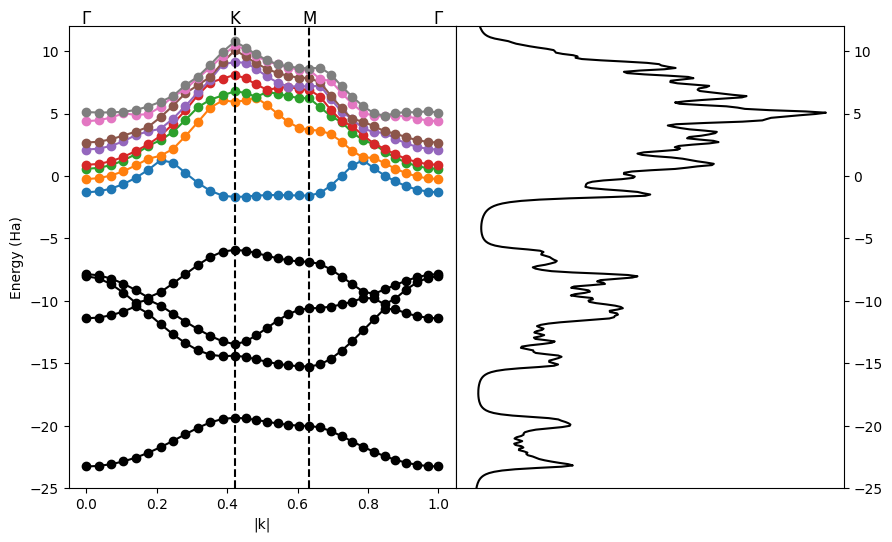

In [37]:
bands = np.loadtxt(os.path.join(path, 'static/bandstructure'))
dos = np.loadtxt(os.path.join(path, 'static/total-dos.dat'))
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0.0)
axs[0].plot(bands[:,0], bands[:,4:8], 'o-', color = 'k')
axs[0].plot(bands[:,0], bands[:,8:], 'o-',)
axs[1].plot(dos[:,1], dos[:,0], 'k')
axs[1].yaxis.tick_right()
axs[1].set_xticks([])
for ax in axs:
    ax.set_ylim(-25, 12)
    
axs[0].vlines(bands[:,0][12], -25, 12, linestyle='--', color='k')
axs[0].vlines(bands[:,0][19], -25, 12, linestyle='--', color='k')
axs[0].text(bands[:,0][0], 12.2, '$\Gamma$', fontsize=12, ha='center')
axs[0].text(bands[:,0][-1], 12.2, '$\Gamma$', fontsize=12, ha='center')

axs[0].text(bands[:,0][12], 12.2, 'K', fontsize=12, ha='center')
axs[0].text(bands[:,0][19], 12.2, 'M', fontsize=12, ha='center')
axs[0].set_xlabel('|k|')
axs[0].set_ylabel('Energy (Ha)')

In [38]:
wavefunctions.keys()

dict_keys(['1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_8', '1_9', '1_10', '1_11', '1_12', '2_1', '2_2', '2_3', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '3_1', '3_2', '3_3', '3_4', '3_5', '3_6', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '4_1', '4_2', '4_3', '4_4', '4_5', '4_6', '4_7', '4_8', '4_9', '4_10', '4_11', '4_12', '5_1', '5_2', '5_3', '5_4', '5_5', '5_6', '5_7', '5_8', '5_9', '5_10', '5_11', '5_12', '6_1', '6_2', '6_3', '6_4', '6_5', '6_6', '6_7', '6_8', '6_9', '6_10', '6_11', '6_12', '7_1', '7_2', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_10', '7_11', '7_12', '8_1', '8_2', '8_3', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '9_1', '9_2', '9_3', '9_4', '9_5', '9_6', '9_7', '9_8', '9_9', '9_10', '9_11', '9_12', '10_1', '10_2', '10_3', '10_4', '10_5', '10_6', '10_7', '10_8', '10_9', '10_10', '10_11', '10_12', '11_1', '11_2', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '12_1', 

In [54]:
d1 = wavefunctions[wf]
x = sorted(d1[:,0])
y = sorted(d1[:,1])
Map = np.zeros((len(x), len(y)))
for i, item in enumerate(d1):
    Map[x.index(item[0]), y.index(item[1])] = item[2]

In [65]:
wavefunctions.keys()

dict_keys(['1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_8', '1_9', '1_10', '1_11', '1_12', '2_1', '2_2', '2_3', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '3_1', '3_2', '3_3', '3_4', '3_5', '3_6', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '4_1', '4_2', '4_3', '4_4', '4_5', '4_6', '4_7', '4_8', '4_9', '4_10', '4_11', '4_12', '5_1', '5_2', '5_3', '5_4', '5_5', '5_6', '5_7', '5_8', '5_9', '5_10', '5_11', '5_12', '6_1', '6_2', '6_3', '6_4', '6_5', '6_6', '6_7', '6_8', '6_9', '6_10', '6_11', '6_12', '7_1', '7_2', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_10', '7_11', '7_12', '8_1', '8_2', '8_3', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '9_1', '9_2', '9_3', '9_4', '9_5', '9_6', '9_7', '9_8', '9_9', '9_10', '9_11', '9_12', '10_1', '10_2', '10_3', '10_4', '10_5', '10_6', '10_7', '10_8', '10_9', '10_10', '10_11', '10_12', '11_1', '11_2', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '12_1', 

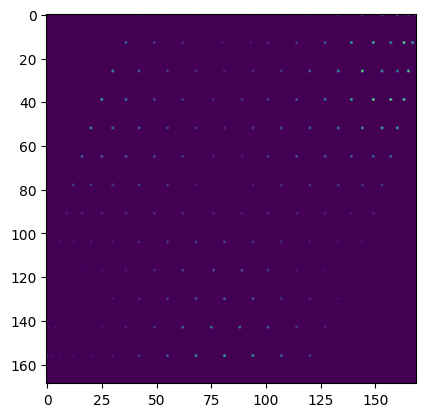

In [68]:
d1 = np.loadtxt(os.path.join(path, 'static/density.z=0'))

x = sorted(d1[:,0])
y = sorted(d1[:,1])
Map = np.zeros((len(x), len(y)))
for i, item in enumerate(d1):
    Map[x.index(item[0]), y.index(item[1])] = item[2]
plt.imshow(Map.T, cmap='viridis')